<a href="https://colab.research.google.com/github/sonusajid004/DeepLearning_models/blob/master/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here i am using Lenet to categorize digits i.e. use MNIST dataset.


Letnet's architechture is ..

[Image Source](https://engmrk.com/lenet-5-a-classic-cnn-architecture/)

![Lenet Summary ](https://engmrk.com/wp-content/uploads/2018/09/LeNEt_Summary_Table.jpg)


In [14]:
import keras
from keras import layers



model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu',kernel_initializer="he_uniform" ,input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',kernel_initializer="he_uniform"))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu',kernel_initializer="he_uniform"))
model.add(layers.AveragePooling2D())


model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [15]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_7 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_8 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
average_pooling2d_9 (Average (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16)               

In [16]:
##Loading Data


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.datasets import mnist
from keras.utils import np_utils
import keras

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [18]:
# Training Parameters
batch_size = 128
epochs = 20
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("./lenet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 


model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
history = model.fit(x_train, y_train,
                      callbacks=callbacks,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

model.save("./mnist_LeNet.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.2473 - accuracy: 0.9243 - val_loss: 0.1798 - val_accuracy: 0.9429

Epoch 00001: val_loss improved from inf to 0.17975, saving model to ./lenet.h5
Epoch 2/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.1730 - accuracy: 0.9471 - val_loss: 0.1545 - val_accuracy: 0.9504

Epoch 00002: val_loss improved from 0.17975 to 0.15448, saving model to ./lenet.h5
Epoch 3/20
60000/60000 [==============================] - 19s 325us/step - loss: 0.1422 - accuracy: 0.9561 - val_loss: 0.1251 - val_accuracy: 0.9604

Epoch 00003: val_loss improved from 0.15448 to 0.12512, saving model to ./lenet.h5
Epoch 4/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.1240 - accuracy: 0.9618 - val_loss: 0.1052 - val_accuracy: 0.9670

Epoch 00004: val_loss improved from 0.12512 to 0.10521, saving model to ./lenet.h5
Epoch 5/20
60000/60000

Confusion Matrix
[[ 968    0    1    0    0    2    2    1    3    3]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   3    1 1009    1    1    3    1    6    7    0]
 [   0    0    2  994    0    8    0    3    2    1]
 [   1    0    2    1  960    0    3    1    2   12]
 [   1    0    0    2    0  883    2    1    3    0]
 [   2    3    0    0    1    5  945    0    2    0]
 [   1    4   19   13    0    1    0  986    3    1]
 [   1    0    2    3    2    2    1    1  961    1]
 [   3    0    0    1    3    9    1    3   12  977]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       9

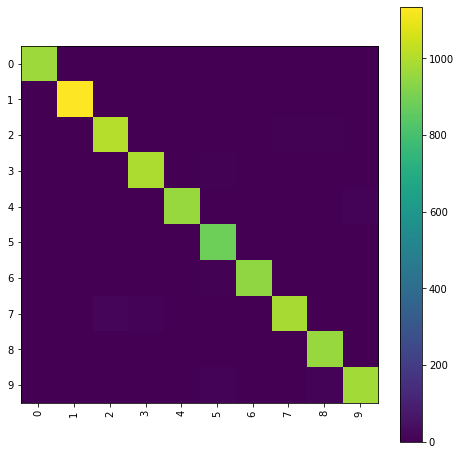

In [29]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 28273
nb_validation_samples = 3534

#Confution Matrix and Classification Report
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))
print('Classification Report')
print(classification_report(np.argmax(y_test,axis=1), y_pred))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(np.argmax(y_test,axis=1), y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(10)
_ = plt.xticks(tick_marks, np.arange(10), rotation=90)
_ = plt.yticks(tick_marks, np.arange(10))

(10000, 10)

(10000,)